<a href="https://colab.research.google.com/github/vjbarayuga/Week9-Unsupervised_ML_Clustering/blob/main/PCAExercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib inline
import sklearn
from sklearn.impute import SimpleImputer #Import SimpleImputer class from sklearn.impute
from termcolor import colored as cl # text customization
import seaborn as sb # visualization
from mpl_toolkits.mplot3d import Axes3D # 3d plot
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [29]:
# import google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:

df = pd.read_csv('/content/drive/MyDrive/Coding_DOJO-Data_Science_Bootcamp/04_AdvancedML/DATASET/mnist_784.csv')

df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to class
dtypes: int64(785)
memory usage: 419.2 MB


In [7]:
# get column names
column_names = df.columns

# for each attributes (columns), print value counts
for column_name in  column_names:
    print(df[column_name].value_counts())

Streaming output truncated to the last 5000 lines.
105       53
33        42
Name: pixel381, Length: 256, dtype: int64
0      23298
253     9082
254     5686
252     4198
255     1582
       ...  
33        49
122       49
87        46
74        44
103       43
Name: pixel382, Length: 256, dtype: int64
0      28448
253     7787
254     4318
252     3723
255     1339
       ...  
87        48
101       47
127       45
90        42
58        41
Name: pixel383, Length: 256, dtype: int64
0      36562
253     5608
254     2627
252     2351
255     1012
       ...  
121       44
110       42
105       39
101       37
159       33
Name: pixel384, Length: 256, dtype: int64
0      45734
253     3814
254     1556
252     1281
255      798
       ...  
181       28
182       27
177       26
175       25
87        19
Name: pixel385, Length: 256, dtype: int64
0      53571
253     2541
252      996
254      913
255      509
       ...  
95        19
129       18
87        17
77        14
157       1

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pixel1,70000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel2,70000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel3,70000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel4,70000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel5,70000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
pixel781,70000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel782,70000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel783,70000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
pixel784,70000.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [9]:
df.columns

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780', 'pixel781',
       'pixel782', 'pixel783', 'pixel784', 'class'],
      dtype='object', length=785)

In [10]:
df.duplicated().sum()

0

In [11]:
df.duplicated(keep=False).sum()

0

In [12]:
# print the duplicate dataset
df.loc[df.duplicated(keep=False)]

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class


In [13]:
# get column names
column_names = df.columns

# for each attributes (columns), print value counts
for column_name in  column_names:
    print(df[column_name].unique())

Streaming output truncated to the last 5000 lines.
 140  28  98 138  79  33 246 103 180  70   3 136 224 202 101 216 244  90
 152 131 129  20 213 186  49 229  58  63  69 148 234   5  47 132 111 236
 154 142 150 212 135 217 126 100 185 124 123  99   8  45  34 195 219 179
 134 187 146 231 199  31 206 228 169 235  61  96 181 222  50 168 178  14
 166 156 137  44  87  60 164 177  65 173  89  54 149  91  52  35 114  75
  74 174 115  88 153  46 192  56  39 145 116 210 238 204 161 163 139 209
  92 182 201 208 170 196 220 110  78 130 151 122 108 104 184  97 211 106
 167 172 248]
[  0  70 252  41  55   5 201  57 116 253 226   9  73  36 162 185 250 221
  14 157  51 230 254 225 142   6  64  75 240 241  53 228 224 191  21  66
  47 117  20 243  59 190  72 251  94  16  22  29  62 173 217 107  77 114
 227 239  65 127 128 223  88  19 186  68  89  44  54 197  11  85 187 255
 189 102 160  49  10 168  81 149  83 126 130  87 145 249 115 233 140 172
 125 194  32 246 184   4  39  13 132  24  35 141  25  37 14

In [14]:
df.isnull().sum()

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel781    0
pixel782    0
pixel783    0
pixel784    0
class       0
Length: 785, dtype: int64

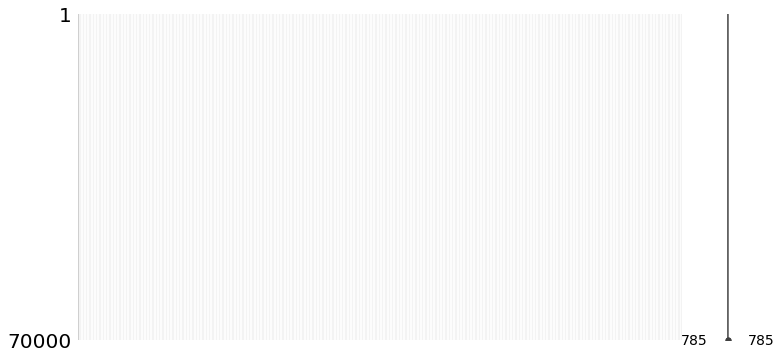

In [15]:
import missingno as msno 
# Visualize missing values as a matrix 
msno.matrix(df,figsize=(12,6)) 

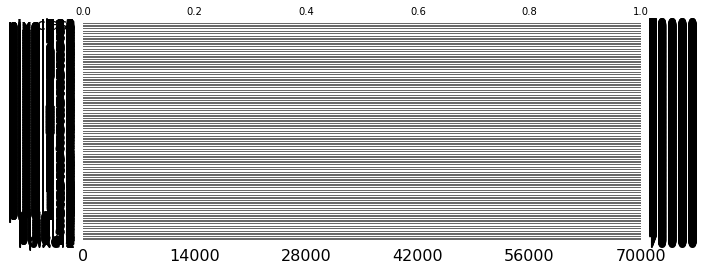

In [16]:
# Visualize the number of missing 
# values as a bar chart 
msno.bar(df,figsize=(10,4)) 

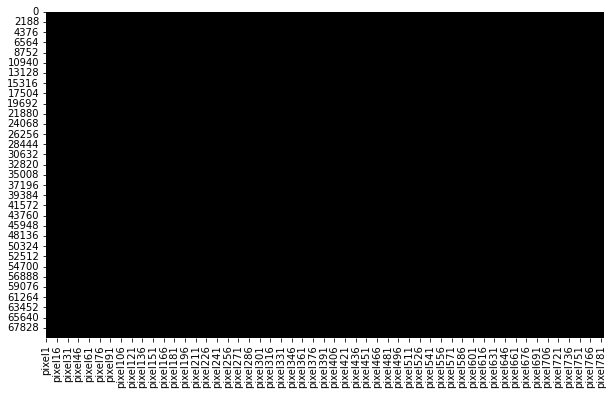

In [17]:
#sns.heatmap(df.isnull(),cmap="viridis")
plt.figure(figsize=(10,6))
sns.heatmap(
    data=df.isnull(),
    cmap=sns.color_palette(['black', 'yellow', 'orange', 'white']),cbar=False)

In [37]:
# Train test split
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, stratify=y)

In [40]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
# Instantiate PCA
pca = PCA(.95)
pca.fit(X_train)

PCA(n_components=0.95)

In [45]:
# transform the X data
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
X_train_pca.shape

In [46]:
# I will use logistic regression to classify this data
# Any classification algorithm may apply
lr = LogisticRegression(solver = 'lbfgs', max_iter = 10000) # Increasing number of iterations since I get a convergence warning with default

In [47]:
lr.fit(X_train_pca, y_train)

LogisticRegression(max_iter=10000)

In [48]:
print('Training accuracy:', lr.score(X_train_pca, y_train))
print('Testing accuracy:', lr.score(X_test_pca, y_test))

Training accuracy: 0.9370666666666667
Testing accuracy: 0.9213714285714286
